<a href="https://colab.research.google.com/github/AlexanderAvocone/Project/blob/master/Linear_Regession.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praxisaufgaben zur linearen Regression**
Ziel der Übung ist es anhand einer praktischen Aufgabe sich mit der linearen Regression zu beschäftigen.
Aufgabe: Wir sollen für eine (erfundene) Ecommerce Firma herrausfinden, ob es besser ist die App oder die Website zu optimieren.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

## **Datenanalyse**



### Erster Eindruck

In [ ]:
df = pd.read_csv("Ecommerce Customers")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


Wie wir sehen hat es 8x500 Einträge mit 0 fehlenden Einträgen. Auch anhand der columns können wir schon unseren Datensatz gut einschränken. Email, Adresse und Username(Avatar) sind für unsere Aufgabenstellung irrelevant, wodurch wir diese löschen können.

In [ ]:
df.drop(["Email","Address", "Avatar"],axis=1, inplace = True)


### Datenanalyse
Betrachten wir nun den Zusammenhang zwischen "Time on Website/App" und "Yearly Amount Spent", so stellen wir fest, dass Menschen mehr kaufen, wenn sie länger die App verwenden.

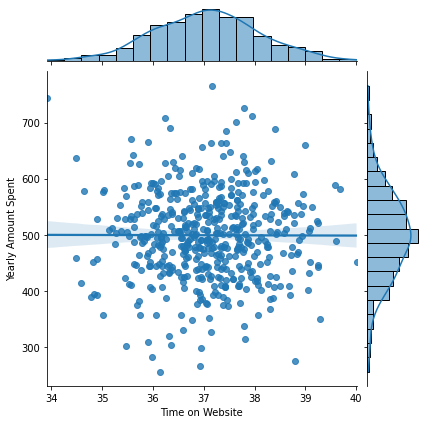

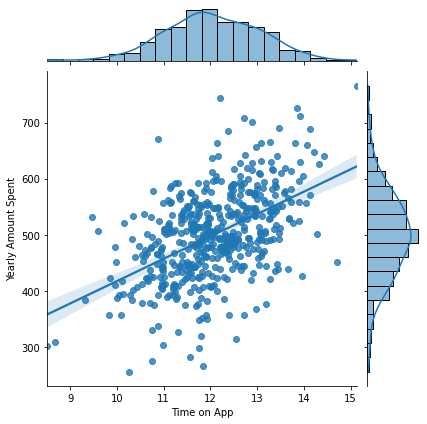

In [ ]:

sns.jointplot(x="Time on Website", y="Yearly Amount Spent", data = df, kind = "reg")

sns.jointplot(x="Time on App", y="Yearly Amount Spent", data = df, kind = "reg")


In [ ]:
from scipy import stats
g = stats.linregress(x = df['Time on App'],y =df['Yearly Amount Spent'])
print(g)

LinregressResult(slope=-0.20728383743601536, intercept=506.99606960253277, rvalue=-0.0026408446721589095, pvalue=0.9530290603518241, stderr=3.517275577495052)


rvalue = correlation, pvalue = irgendwas mit Hypothesentest, wie chi^2, stderr = sigma
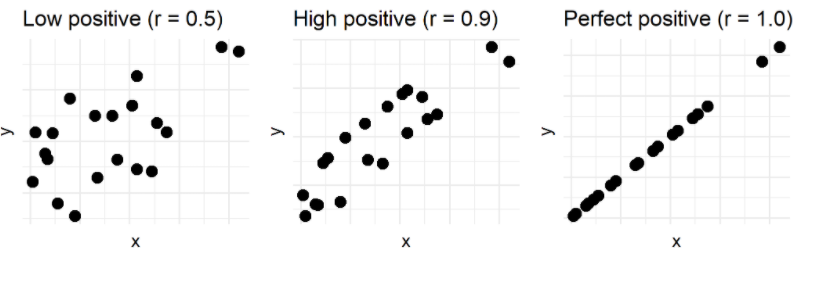

**Funktionsfit in Scipy**


[39.83449005 19.20932741]
y =  39.83449005079599 +- 3.0973046878159463


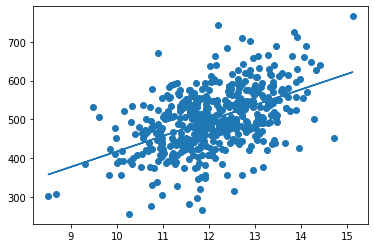

In [ ]:
from scipy.optimize import curve_fit
def funktion (a,x,c):
  return a*x + c

p,s = curve_fit(funktion, df["Time on App"], df["Yearly Amount Spent"])
print(p)

plt.scatter(df["Time on App"], df["Yearly Amount Spent"])
plt.plot(df["Time on App"],funktion(p[0],df["Time on App"],p[1]) )

sigma = np.sqrt(np.diag(s))

print("y = ", p[0], "+-", sigma[0])


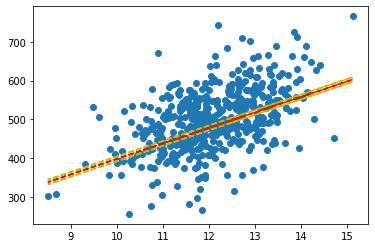

In [ ]:
plt.scatter(df["Time on App"], df["Yearly Amount Spent"])
plt.plot(df["Time on App"],p[0]*df["Time on App"]+2*sigma[0], "y--") 
plt.plot(df["Time on App"],p[0]*df["Time on App"], "r--" )
plt.plot(df["Time on App"],p[0]*df["Time on App"]-2*sigma[0],"y--") 

Man kann auch via Boxplot rausfinden, ob viele oder wenige Daten außerhalb der Standardabweichung liegen.
Mit dem probability-plot sieht man dann auch ob ein Diagramm gaussverteilt ist und wenn ja, in welche Richtung das eher geht.
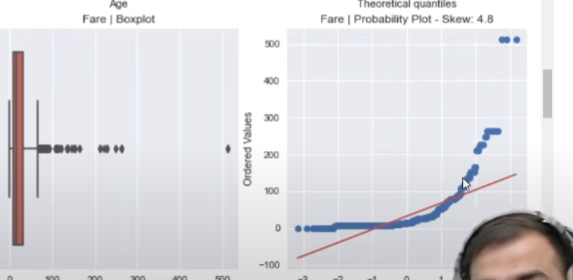